In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

%matplotlib inline 

data = pd.read_csv("winequality-red.csv", sep=";")
#intercept = np.ones((len(data),1))
#data.insert(0, "intercept", intercept, allow_duplicates = False)
X= data.drop(columns = "quality")
y = data["quality"]

Text(0, 0.5, 'weights')

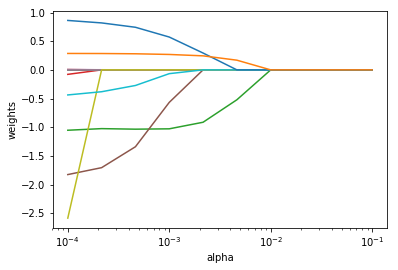

In [5]:
alphas = np.logspace(-4,-1,10)
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### Multiple linear regression


In [6]:
lin_reg = LinearRegression()
MSE = cross_val_score(lin_reg, X, y, scoring = "neg_mean_squared_error", cv = 5)
mean_MSE = np.mean(MSE)
print(mean_MSE)

-0.4366293880320983


#### Ridge Regression

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
alphas = {"alpha": np.logspace(-4,-1,10)}
ridge_regressor = GridSearchCV(ridge, alphas, scoring="neg_mean_squared_error", cv = 5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.046415888336127774}
-0.4358687733548212


#### Lasso Regression

In [8]:
from sklearn.linear_model import Lasso
lasso = Lasso()
alphas = {"alpha": np.logspace(-4,-1,10)}
lasso_regressor = GridSearchCV(lasso, alphas, scoring = "neg_mean_squared_error", cv = 5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001}
-0.43587064274898135


0.0001 [ 0.          0.00444919 -1.2220295  -0.14848575  0.01413483 -1.81558252
  0.0028523  -0.00295551 -0.         -0.47199826  0.81834041  0.28514731]
0.00021544346900318845 [ 0.          0.00491981 -1.21981041 -0.14103778  0.01382496 -1.7453015
  0.00284912 -0.00294581 -0.         -0.45681517  0.80727248  0.28545158]
0.00046415888336127773 [ 0.          0.00593306 -1.21502528 -0.1249871   0.01315736 -1.59389506
  0.00284232 -0.00292494 -0.         -0.42410815  0.78342839  0.28610703]
0.001 [ 0.          0.00811606 -1.2047161  -0.09040701  0.01171905 -1.26769961
  0.00282767 -0.00287999 -0.         -0.35364291  0.73205783  0.28751915]
0.002154434690031882 [ 0.          0.0128186  -1.18250159 -0.0159023   0.00862029 -0.56494244
  0.00279617 -0.00278316 -0.         -0.20183396  0.62138438  0.29056139]
0.004641588833612777 [ 0.          0.02548735 -1.14817656 -0.          0.00547111 -0.
  0.0026207  -0.00257825 -0.         -0.          0.50055008  0.29273392]
0.01 [ 0.          0.03133

/Users/sumaanyumaheshwari/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


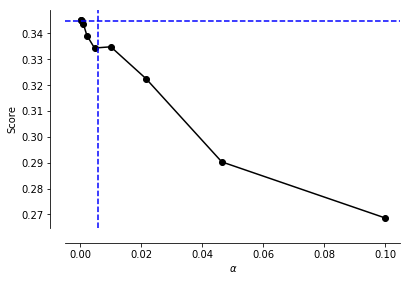

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

alphas = np.logspace(-4,-1,10)
scores = np.empty_like(alphas)
for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha= a)
    lasso.fit(X_train,y_train)
    scores[i] = lasso.score(X_test,y_test)
    print(a, lasso.coef_)

lassocv = linear_model.LassoCV()
lassocv.fit(X,y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
sns.despine(offset=15)